# Exploratory Data Analysis: Jane street market analysis data

In [57]:
import pandas as pd
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, gc

import torch
import torch.nn as nn
import torch.nn.functional as F


In [20]:
from torchvision.models import resnet50, ResNet50_Weights

model_resnet50 = resnet50(weights=ResNet50_Weights.IMAGENET1K_V1)


In [21]:
model_resnet50

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [24]:
model_resnet50.conv1

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

In [ ]:
DIR_PATH = os.getcwd()
DIR_PATH
DATA_DIR_PATH = os.path.join(DIR_PATH,"jane-street-real-time-market-data-forecasting")
print(DATA_DIR_PATH)

# Print directory tree of the data directory
for root, dirs, files in os.walk(DATA_DIR_PATH):
    level = root.count(os.sep)
    indent = " " * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    sub_indent = " " * 4 * (level + 1)
    for file in files:
        print(f"{sub_indent}{file}")


                            jane-street-real-time-market-data-forecasting/
                                .DS_Store
                                responders.csv
                                features.csv
                                sample_submission.csv
                                train.parquet/
                                    .DS_Store
                                    partition_id=1/
                                        part-0.parquet
                                    partition_id=6/
                                        part-0.parquet
                                    partition_id=8/
                                        part-0.parquet
                                    partition_id=9/
                                        part-0.parquet
                                    partition_id=7/
                                        part-0.parquet
                                    partition_id=0/
                                        part-0.parquet
  

## Features

In [53]:
features = pd.read_csv(os.path.join(DATA_DIR_PATH,"features.csv"))
features = features.drop(columns="feature")
features.head(7)

,tag_0,tag_1,tag_2,tag_3,tag_4,tag_5,tag_6,tag_7,tag_8,tag_9,tag_10,tag_11,tag_12,tag_13,tag_14,tag_15,tag_16
0,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True
1,False,False,True,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
4,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,True
5,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True
6,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,True


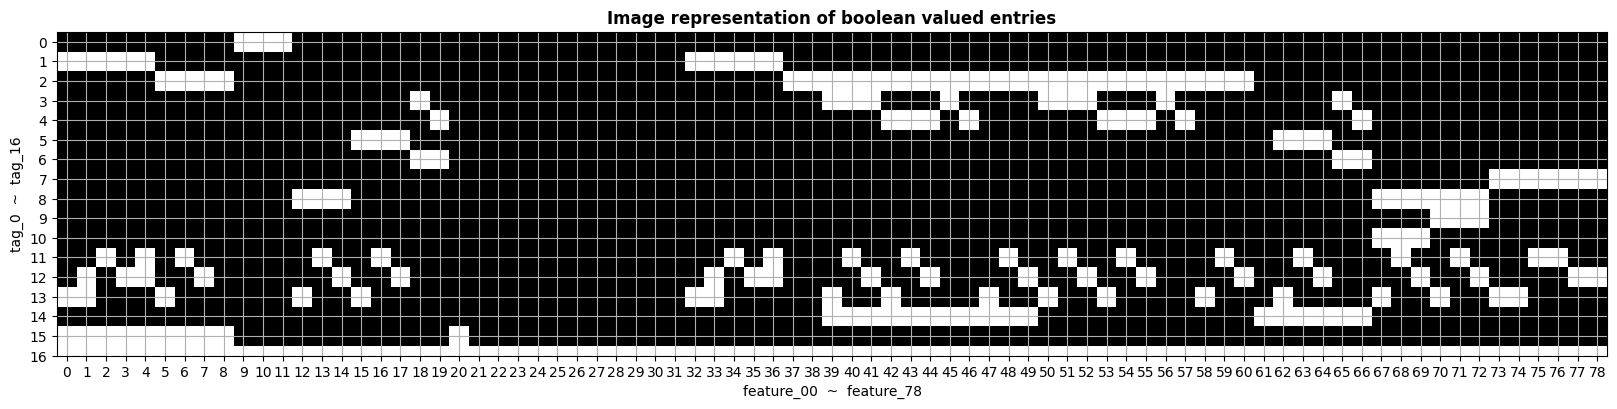

In [54]:
plt.figure(figsize=(20, 10))
plt.imshow(features.iloc[:, 1:].T.values, cmap="gray")
plt.xlabel("feature_00  ~  feature_78")
plt.ylabel("tag_0  ~  tag_16")
plt.yticks(np.arange(17))
plt.xticks(np.arange(79))
plt.title("Image representation of boolean valued entries",weight="bold")
plt.grid()
plt.show()

In [55]:
features_columns  = features.columns
features_columns

Index(['tag_0', 'tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5', 'tag_6', 'tag_7',
       'tag_8', 'tag_9', 'tag_10', 'tag_11', 'tag_12', 'tag_13', 'tag_14',
       'tag_15', 'tag_16'],
      dtype='object')

Text(0.5, 1.0, 'Correlation Plot')

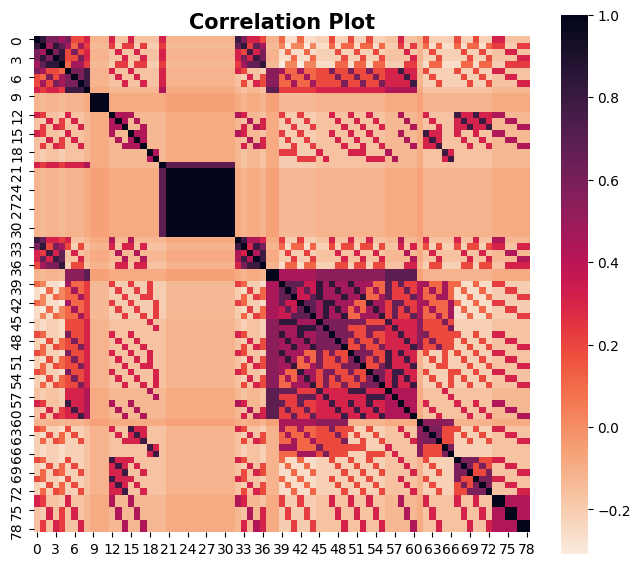

In [ ]:

plt.figure(figsize=(8,7))
corrM = features.T.corr()
cmap = sns.color_palette("rocket_r", as_cmap=True)
sns.heatmap(corrM, square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot", weight= 'bold', size= 15)
plt.show()

## Responders

In [73]:
responders = pd.read_csv(f"{DATA_DIR_PATH}/responders.csv")
responders = responders.drop(columns='responder')
responders

,tag_0,tag_1,tag_2,tag_3,tag_4
0,True,False,True,False,False
1,True,False,False,True,False
2,True,True,False,False,False
3,False,False,True,False,True
4,False,False,False,True,True
5,False,True,False,False,True
6,False,False,True,False,False
7,False,False,False,True,False
8,False,True,False,False,False


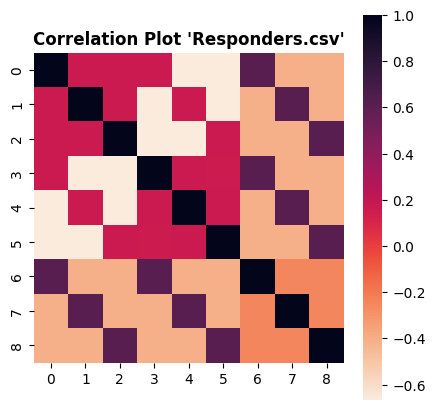

In [79]:
plt.figure(figsize=(5,5))
sns.heatmap(responders.T.corr(), square=True, cmap=cmap, vmax=1)
plt.title("Correlation Plot 'Responders.csv'", weight= 'bold', size= 12)
plt.show()

## Train.parquet